# Likelihoods with Logistic Regression

## Introduction

Let's take another look at our graph of observations alog with the decision function.

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



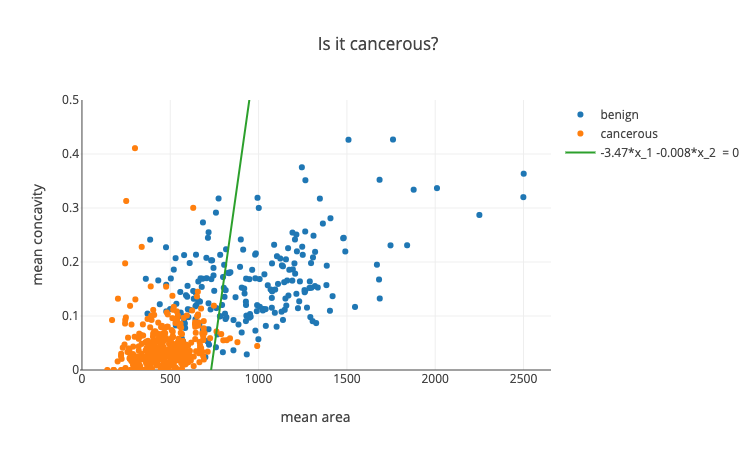

In [13]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
import pandas as pd

def decision_boundary_y(x, coefs, intercept):
    coef_pair = coefs[0]
    return (coef_pair[0]/coef_pair[1])*x + intercept[0]/coef_pair[1]

X = dataset['data']
y = dataset['target']
df = pd.DataFrame(X, columns = dataset['feature_names'])
scoped_df = df[['mean area', 'mean concavity']]
df['is_cancerous'] = y

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(scoped_df, y)

area_values = list(range(500, 1000, 5))
boundaries = [decision_boundary_y(idx, model.coef_, model.intercept_) for idx in area_values]
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')
scoped_cancerous_df = scoped_df[df.is_cancerous == 1]
scoped_non_cancerous_df = scoped_df[df.is_cancerous != 1]

mean_area_c = scoped_cancerous_df['mean area']
mean_concavity_c = scoped_cancerous_df['mean concavity']

mean_area_nc = scoped_non_cancerous_df['mean area']
mean_concavity_nc = scoped_non_cancerous_df['mean concavity']

cancerous_trace = trace_values(x_values=mean_area_c, y_values=mean_concavity_c, name = 'cancerous')
non_cancerous_trace = trace_values(x_values=mean_area_nc, y_values=mean_concavity_nc, name = 'benign')



layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([non_cancerous_trace, cancerous_trace,  decision_trace], layout = layout)

## Our Initial Attempts

In [168]:
def decision_boundary_function(mean_area, mean_concavity):
    return -0.00802333*mean_area - 3.47361781 * mean_concavity + 5.86599622

When we pass observations into our decision function, we no longer just care about whether the output is positive or negative.  But we also care about how positive or negative this return value is.  The more positive or negative, the more confident we are in our prediction.  Where our decision function outputs zero, we are saying that our model is predicting a fifty-fifty chance of either outcome.

So if we start plugging in different observations into our decision function, we can compare the outputs.   

In [169]:
# make predictions here

But it still would be nice if we could translate these outputs, which we can call our *scores* into probabilities.

### Introducing the sigmoid function

The sigmoid function is the function $S$ defined as: 

$$ S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1}$$ 

Here, $x$ is the score that is returned from our decision function.

Remember our goals, we wanted a function that did the following: 

* equaled one half when $x = 0$ 
* transformed our large negative scores to a value close to zero 
* transformed our large positive scores to a value close to one

1. When $x = 0$ we have:

$$ S(0) = \frac{1}{1 + e^{-0}} = \frac{e^0}{e^0 + 1} = \frac{1}{1 + 1} = \frac{1}{2}$$ 

2. When $x = -100$ (a somewhat large negative number) we have:

$$ S(-100) = \frac{1}{1 + e^{- (-100)}} = \frac{1}{1 + e^{100}} \approx \frac{1}{1 + \infty} \approx \frac{1}{\infty} \approx 0 $$ 

2. When $x = 100$ (a somewhat large positive number) we have:

$$ S(-100) = \frac{1}{1 + e^{-100}} = \frac{1}{1 + \frac{1}{e^{100}}} = \frac{1}{1 + 0} \approx 1 $$ 

So we can see that this function appears to meet our conditions, and would work well for us.  Now when we have a decision function, it can take the distances of the points from the decision function.  If the distance is far from the line in the positive direction, we return a probability close to one.  If it's far from the line in the negative direction, we return a probability close to zero.  And if the distance is near the line we return a probability close to fifty percent. 

Ok, it's time to plot our sigmoid function.

### Plotting the Sigmoid Function

To plot the sigmoid function, let's first translate it into a function.

In [19]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

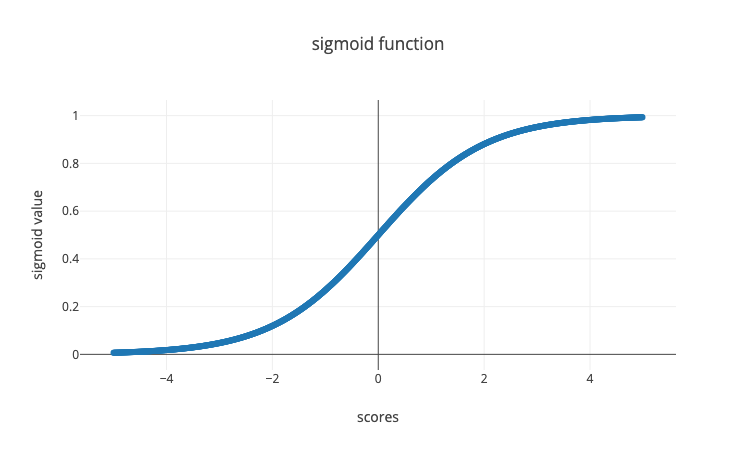

In [21]:
import numpy as np
from graph import trace_values, plot
x_values = [scaled_x/100 for scaled_x in list(range(-500, 500))]
y_values = [sigmoid(x) for x in x_values]

sigmoid_trace = trace_values(x_values, y_values)
plot([sigmoid_trace], {'title': 'sigmoid function', 'xaxis': {'title': 'scores'}, 'yaxis': {'title': 'sigmoid value'}})

So this is the famous sigmoid function.  And it follows the rules that we established above.  It approaches zero as $x$ becomes more negative, and approaches one as $x$ becomes more positive.  And it returns .5 when crossing x-axis. 

### From decision boundary plot to sigmoid plot

Ok, let's go back to our original problem of identifying cancer cells.  Remember that our goal is to find a decision function that differentiates between benign and cancerous cell.  This is our plot.

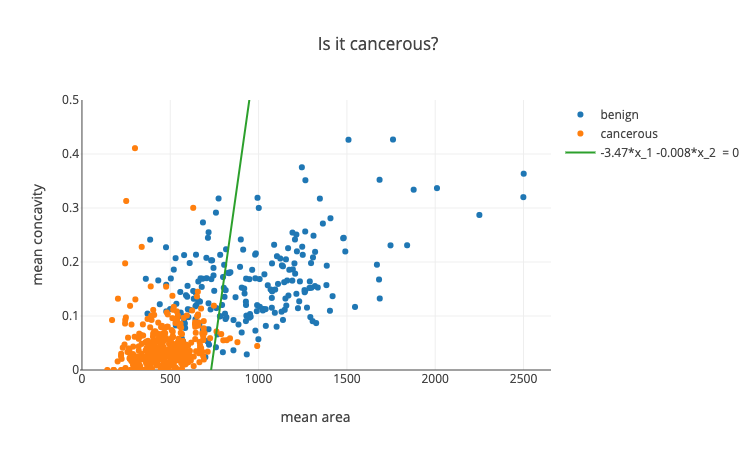

In [172]:
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([non_cancerous_trace, cancerous_trace,  decision_trace], layout = layout)

Now, we can get a sense of how confident we are in each of our points.

So we already saw how we can predict each of our datapoints.  We simply take the features and pass them through our decision function.

In [24]:
scoped_df.set_copy = False
def decision_boundary_function(mean_area, mean_concavity):
    return -0.00802333*mean_area - 3.47361781 * mean_concavity + 5.86599622

prediction_scores = scoped_df.loc[:, ['mean area', 'mean concavity']].apply(lambda x: decision_boundary_function(*x), axis=1)
scoped_df.loc[:, 'prediction_scores'] = prediction_scores

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



And then we can convert our scores into prediction probabilities using our `sigmoid` function.

In [25]:
prediction_probs = scoped_df.loc[:, 'prediction_scores'].apply(lambda x: sigmoid(x))
scoped_df.loc[:, 'prediction_probs'] = prediction_probs
scoped_df[:3]

,mean area,mean concavity,y,prediction_scores,prediction_probs
0,1001.0,0.3001,0,-3.207790,0.038874
1,1326.0,0.0869,0,-5.074797,0.006214
2,1203.0,0.1974,0,-4.471762,0.011298


Now we can see how our scores translate to prediction probabilities.

In [26]:
scoped_df.loc[:, 'y'] = y
df_benign, df_cancerous = [x for _, x in scoped_df.groupby(scoped_df['y'] == 1)]

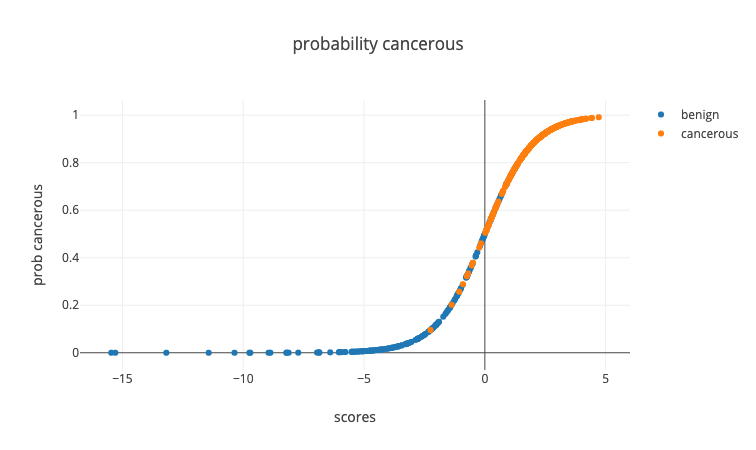

In [29]:
from graph import trace_values, plot
benign_sigmoid_trace = trace_values(df_benign['prediction_scores'], df_benign['prediction_probs'], name = 'benign')
cancerous_sigmoid_trace = trace_values(df_cancerous['prediction_scores'], df_cancerous['prediction_probs'], name = 'cancerous')
plot([benign_sigmoid_trace, cancerous_sigmoid_trace], layout = {'xaxis': {'title': 'scores'}, 'yaxis': {'title': 'prob cancerous'}, 'title': 'probability cancerous'})

So we can see our classifier is assigning a higher likelihood of the cancerous cells in fact being cancerous.

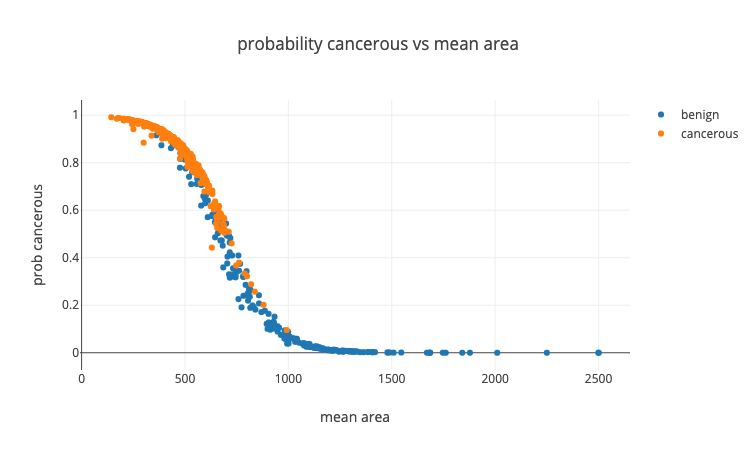

In [31]:
benign_sigmoid_trace = trace_values(df_benign['mean area'], df_benign['prediction_probs'], name = 'benign')
cancerous_sigmoid_trace = trace_values(df_cancerous['mean area'], df_cancerous['prediction_probs'], name = 'cancerous')
plot([benign_sigmoid_trace, cancerous_sigmoid_trace], layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'prob cancerous'}, 'title': 'probability cancerous vs mean area'})

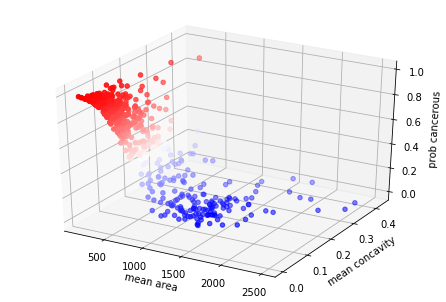

In [184]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) 

zdata = scoped_df['prediction_probs']
xdata = scoped_df['mean_area']
ydata = scoped_df['mean_concavity']

ax.set_xlabel('mean area', rotation=150)
ax.set_ylabel('mean concavity')
ax.set_zlabel('prob cancerous', rotation=60)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='bwr');
ax.clabel(fontsize=9, inline=1)
plt.show()

And to convert these into scores...also do in iframe

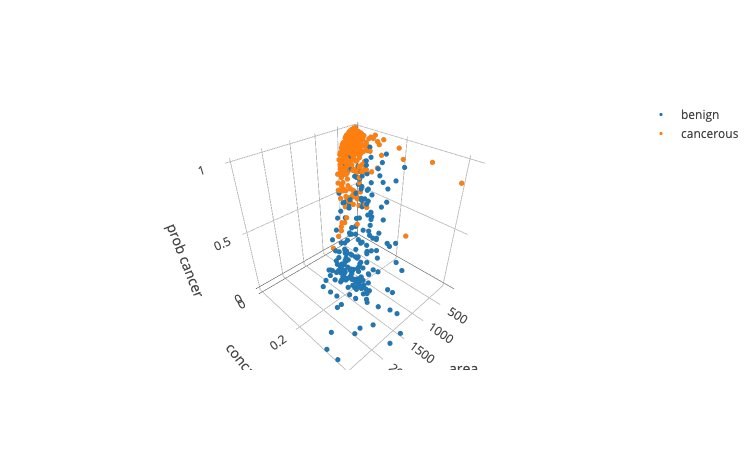

In [213]:
trace_three_d_benign = dict(
        name = 'benign', x = df_benign['mean_area'], y = df_benign['mean_concavity'], z = df_benign['prediction_probs'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )

trace_three_d_cancerous = dict(
        name = 'cancerous', x = df_cancerous['mean_area'], y = df_cancerous['mean_concavity'], z = df_cancerous['prediction_probs'],
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )
plot([trace_three_d_benign, trace_three_d_cancerous], {'scene': {'xaxis': {'title': 'area'}, 'yaxis': {'title': 'concavity'}, 'zaxis': {'title': 'prob cancer'}}})

In [ ]:
decision_trace = trace_values(x_values=area_values, y_values=boundaries, mode = 'lines', name = '-3.47*x_1 -0.008*x_2  = 0')

layout = {'xaxis': {'title': 'mean area'}, 'yaxis': {'title': 'mean concavity', 'range': [0, .5]}, 'title': 'Is it cancerous?'}
plot([non_cancerous_trace, cancerous_trace,  decision_trace], layout = layout)

So from here, we can see our ability to take different attributes, output a score with our decision function, and then use our sigmoid function to translate these into a probability of being cancerous.

And once again, we can use sklearn to do this for us.

In [264]:
X = scoped_df[['mean_area', 'mean_concavity']][:-1]
model.predict_proba(X)[:10, 0]

array([0.96112647, 0.99378651, 0.98870198, 0.12678865, 0.9946646 ,
       0.18393264, 0.94633048, 0.28823469, 0.25927843, 0.22129445])

### Summary

### Resources

[logistic regression cost](https://www.internalpointers.com/post/cost-function-logistic-regression)

* Talk about the score and the logistic function combined, 
* And the effects of increasing or decreasing the slope, or adding a constant to the score.